<a href="https://colab.research.google.com/github/songqsh/20s_ma573/blob/master/src/20bsm01_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Copy all useful class and functions into one py file and save it to git repo. In this case, we have 'bsm01.py' under 'reponame/src' folder
- Import package from Github

In [0]:
%cd~

!git clone https://github.com/songqsh/20s_ma573.git 
pass

/root
fatal: destination path '20s_ma573' already exists and is not an empty directory.


- change current folder and check uploaded files

In [0]:
%cd 20s_ma573/src/
%ls

/root/20s_ma573/src
20bsm01.py                      20fd_ex.tex
20bsm_formula.ipynb             20grid_random_walk_01.ipynb
20bsm_price_change.ipynb        20imp_vol_v01.ipynb
20european_options_class.ipynb  20iv_hw01.ipynb
20explicit_bsm_greeks.ipynb     20montone.ipynb
20fd1.ipynb                     20option_combinations.ipynb
20fd1_rate.ipynb                20optiondata2.dat
20fd2.ipynb                     20pandas.ipynb
20fd_ex.aux                     20python_notebook.ipynb
20fd_ex.log                     20s_github.ipynb
20fd_ex.out                     20vol_smile_v01.ipynb
20fd_ex.pdf                     bsm01.py
20fd_ex.synctex.gz              __pycache__/


- Import module

In [0]:
from bsm01 import *

- Test codes

In [0]:
'''===============
Test bsm_price
================='''
gbm1 = Gbm(
    init_state = 100., 
    drift_ratio = .0475,
    vol_ratio = .2)
option1 = VanillaOption(
    otype = 1,
    strike = 110.,                
    maturity = 1.
)    

print('>>>>>>>>>>call value is ' + str(gbm1.bsm_price(option1)))
option2 = VanillaOption(otype=-1)
print('>>>>>>>>>>put value is ' + str(gbm1.bsm_price(option2)))

>>>>>>>>>>call value is 5.943273183452838
>>>>>>>>>>put value is 10.84042522804176


In [0]:
'''============
test the implied_vol by reversing bsm_formula example in the above
=============='''

option1.market_price = 5.94

print('>>>>>>>>implied volatility is ' + 
     str(implied_volatility(gbm1, option1)))

>>>>>>>>implied volatility is 0.19992187500000036


In [0]:
'''======
Read data
========='''
#Read four-column data
#columns are otype, maturity, strike, option_price
np_option_data1 = np.loadtxt('20optiondata2.dat', comments='#', delimiter=',')

print('>>>>>>otype, maturity, strike, option_price')
print(np_option_data1)

>>>>>>otype, maturity, strike, option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


- Test vol smile

In [0]:
'''====================
create option_list from the data
======================='''

num_row = np_option_data1.shape[0]
option_list = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = np_option_data1[i,0],
      strike = np_option_data1[i,2],
      maturity = np_option_data1[i,1],
      market_price = np_option_data1[i,3]
  )   
  option_list.append(option1)

In [0]:
#expand one column for vol
np_option_data2 = np.append(np_option_data1, np.zeros([num_row,1]), axis = 1)
#compute implied vols and add them into the last column
for i in range(num_row):
  np_option_data2[i,4] = implied_volatility(gbm1, option_list[i])
  
print('>>>>>>otype, maturity, strike, option_price, implied vol')
print(np_option_data2)

>>>>>>otype, maturity, strike, option_price, implied vol
[[  1.           0.16666667  97.           5.32705461   0.19320313]
 [  1.           0.16666667  99.           3.86224255   0.17875   ]
 [  1.           0.16666667 101.           2.7204371    0.17307617]
 [  1.           0.16666667 103.           2.1202793    0.18785156]
 [  1.           0.41666667  97.           7.23756307   0.17350586]
 [  1.           0.41666667  99.           5.95053461   0.17042969]
 [  1.           0.41666667 101.           5.2640122    0.18578125]
 [  1.           0.41666667 103.           4.97493422   0.21083984]]


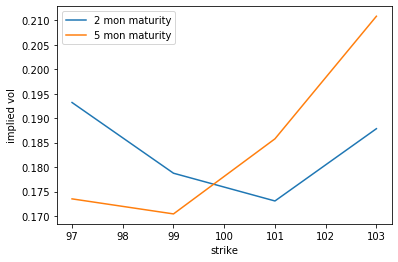

In [0]:
filter1 = np_option_data2[np_option_data2[:,1] == 2/12]
plt.plot(filter1[:,2], filter1[:,4], label = '2 mon maturity')
filter2 = np_option_data2[np_option_data2[:,1] == 5/12]
plt.plot(filter2[:,2], filter2[:,4], label = '5 mon maturity')
plt.ylabel('implied vol')
plt.xlabel('strike')
plt.legend();